In [116]:
import numpy as np
import matplotlib.pyplot as plt
import math

csv_path = "./CSV/"
run_path = csv_path + "Run/"
calib_path = csv_path + "Calib/"
plt.rcParams['figure.figsize'] = [8, 5]

Same code from Lab7 to evaluate block size based on error

In [117]:
def Error(sum, sum2, iblk):

    return math.sqrt(abs(sum2 - sum ** 2) / iblk)

# No need to calculate the error for each block, but only the last block error

def ComputeFinalBlockError(in_data, M, L):

    N = int(M / L)       # Number of blocks

    sum = 0.0
    sum2 = 0.0

    for i in range(0, N):

        # Faster than for loop
        blk_avg = np.sum(in_data[(i * L):((i + 1) * L - 1)]) / L

        sum += blk_avg 
        sum2 += (blk_avg ** 2)

    sum /= N
    sum2 /= N

    return Error(sum, sum2, N)

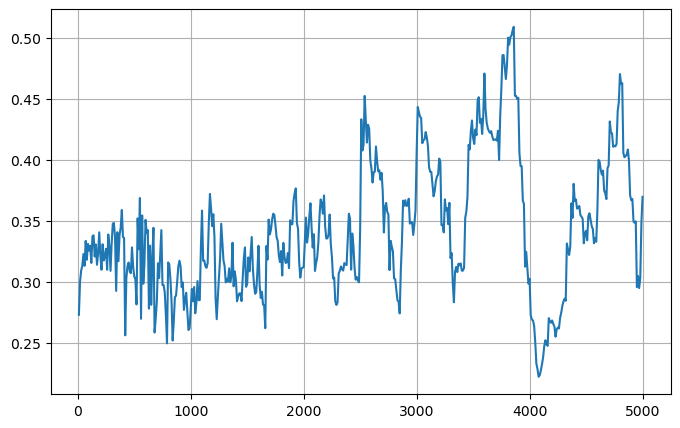

In [118]:
calib_data = np.loadtxt(calib_path + "E.csv", delimiter=',')

M = 2e4
L_min = 10
L_max = int(5e3)
L_range = range(L_min, L_max + 1, 10)       # Step 10 not to overcrowd graph

last_blk_errors = []

for L in L_range:

    last_blk_errors.append(ComputeFinalBlockError(calib_data[:, 1], M, L))

plt.plot(L_range, last_blk_errors)
plt.grid(True)

plt.show()

Something around 500 block should be ok (error has stabilized and is not too high)

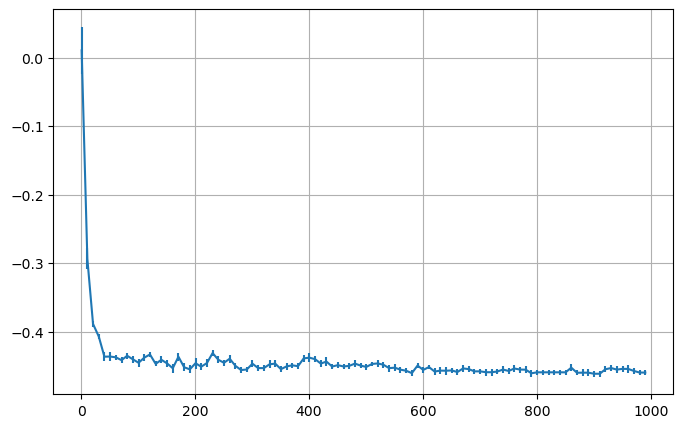

In [119]:
E_data = np.loadtxt(run_path + "SA_E.csv", delimiter=',')

plt.errorbar(1.0 / E_data[:, 0], E_data[:, 1], yerr = E_data[:, 2])
plt.grid(True)
plt.show()

with sa step at 0.8 stuck in a local minimima around -0.27/-0.30 => increase sa step to 1.2 fixes the problem

Beta update law:    1e6 as lower is too strict, no time to equilibrate, step 0.5
                    1e2 was good but oscillating too much, step 0.5
                    1e3 seems a good balance, incresed step to 0.8 => best compromise so far

T update law: does work (especially power law update, linear is a bit too messy), but give less accurate results and generally seem less "natural" than a beta update law

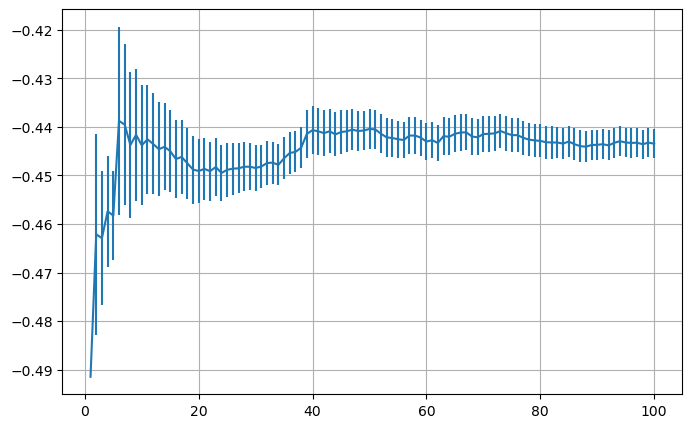

In [120]:
E_final = np.loadtxt(run_path + "E_final.csv", delimiter=',')

plt.errorbar(E_final[:, 0], E_final[:, 2], yerr = E_final[:, 3])
plt.grid(True)
plt.show()

In [121]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] 
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

E,psi = np.linalg.eigh(H)

psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

scale = 0.3

Ground state energy:  -0.4604658796927155


In [122]:
def psi_SA(x, mu, sigma):

    return (np.exp(-0.5 * ((x - mu) / sigma) ** 2) + np.exp(-0.5 * ((x + mu) / sigma) ** 2))

# Psi^2 normalization (numerically computed)
psi_sqrd_norm = 2.61126

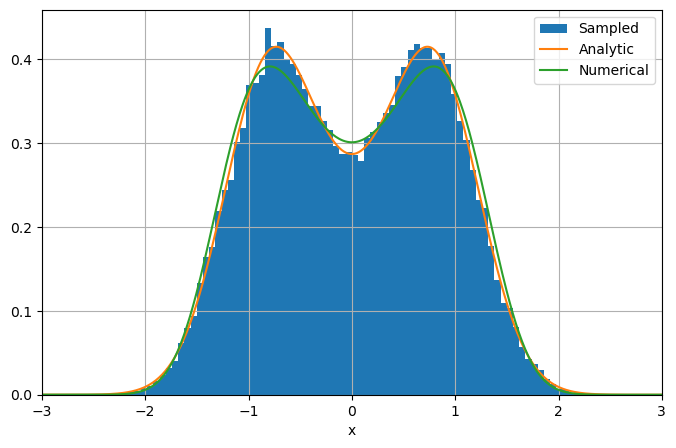

In [123]:
hist_data = np.loadtxt(run_path + "final_hist.csv", delimiter = ',')
out_params = np.loadtxt(run_path + "SA_params.csv", delimiter = ',')

mu = out_params[0]
sigma = out_params[1]

plt.hist(hist_data[0,:], bins = hist_data[0,:], weights = hist_data[1,:], density = True, label = "Sampled")
plt.plot(x, psi_SA(x, mu, sigma) ** 2 / psi_sqrd_norm, label = "Analytic")
plt.plot(x,(psi[0])**2, label = "Numerical")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.legend()
plt.show()

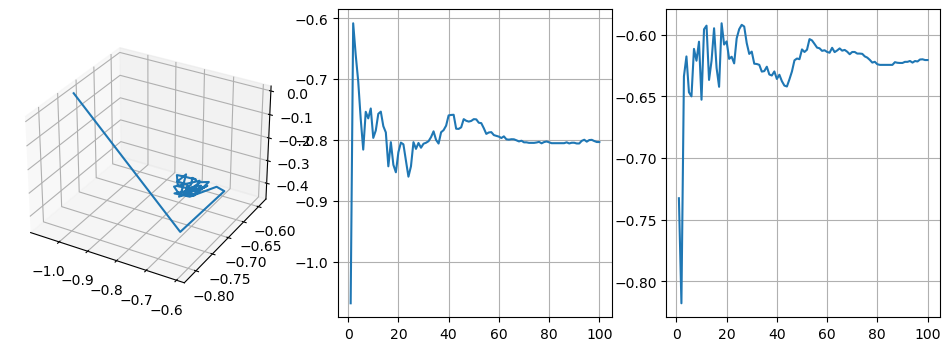

In [124]:
SA_evol_data = np.loadtxt(run_path + "SA_evol.csv", delimiter = ',')

X = SA_evol_data[:, 1]             # mu
Y = SA_evol_data[:, 2]             # sigma
Z = SA_evol_data[:, 0]             # energy

plt.figure().set_size_inches((12, 4))

plt.subplot(1, 3, 1, projection='3d')
plt.plot(X, Y, Z)
plt.subplot(1, 3, 2)
plt.plot(np.arange(1, 101), X)
plt.grid(True)
plt.subplot(1, 3, 3)
plt.plot(np.arange(1, 101), Y)
plt.grid(True)
plt.show()